VAR model including the walking-forward validation, the monthly dataset and all variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [2]:
dvar2 = pd.read_csv("../Data/monthly_data.csv")
dvar2 = dvar2.dropna()

In [3]:
# convert DateTime column into datetime format
dvar2["datetime"] = pd.to_datetime(dvar2['datetime'])
# set DateTime as index
dvar2.set_index("datetime", inplace=True)
dvar2.info()
dvar2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2012-02-29 to 2019-11-30
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   suction_tension (20cm)   94 non-null     float64
 1   suction_tension (40cm)   94 non-null     float64
 2   suction_tension (70cm)   94 non-null     float64
 3   water_temperature        94 non-null     float64
 4   barometric_pressure_qfe  94 non-null     float64
 5   dew_point                94 non-null     float64
 6   water_level              94 non-null     float64
 7   inflow_linth (m3/s)      94 non-null     float64
 8   outflow_limmat (m3/s)    94 non-null     float64
 9   precipitation (mm)       94 non-null     float64
 10  Evapotranspiration (mm)  94 non-null     float64
 11  change_rate              94 non-null     float64
dtypes: float64(12)
memory usage: 9.5 KB


,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2012-02-29,20.929298,4.169540,2.347845,3.763932,978.118839,-5.502229,405.714322,32.760742,71.399478,19.7,7.50,-0.000341
2012-03-31,6.118768,3.344197,2.320676,6.225431,978.553310,2.637923,405.729378,37.625103,74.477262,14.2,45.95,0.000037
2012-04-30,8.059861,3.810556,2.512500,8.165806,959.881884,4.671373,405.782916,53.851635,89.626478,62.2,47.34,0.000132
2012-05-31,9.134409,4.221102,2.569892,13.520385,969.124530,9.016868,405.838784,103.872095,138.309852,94.6,84.68,0.000138
2012-06-30,11.162889,4.964861,2.716153,19.031148,968.749407,13.509106,406.105133,128.218092,198.238391,203.8,71.86,0.000656
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,17.754590,9.390202,6.224059,24.084946,967.987354,14.464124,406.020067,71.571097,95.779511,87.9,114.72,-0.000164
2019-08-31,7.015074,4.549133,3.922157,23.290390,970.104704,15.115188,406.072119,71.688215,111.881487,128.7,68.87,0.000128
2019-09-30,7.228299,3.988014,3.897813,20.211435,971.755440,11.901181,406.036799,50.994090,85.795989,84.7,43.63,-0.000087


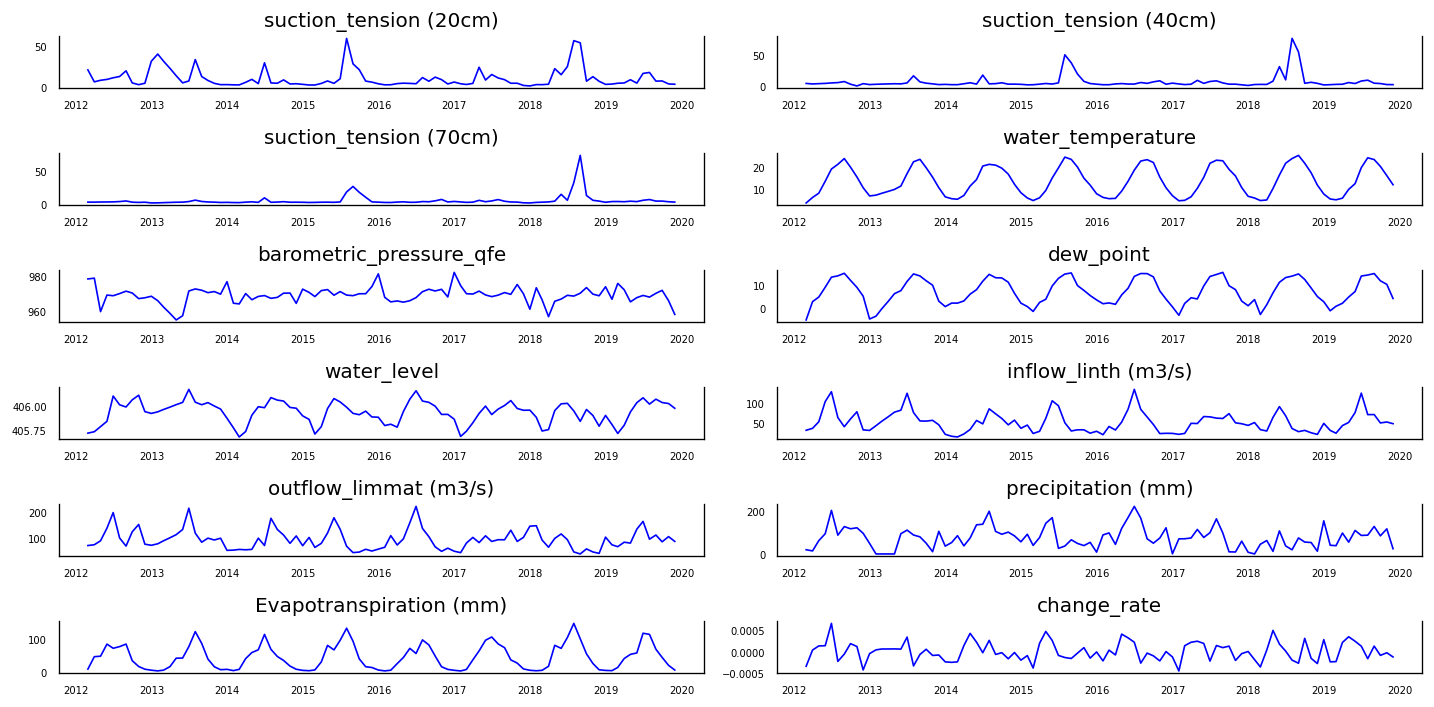

In [4]:
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(12,6))
for i, ax in enumerate(axes.flatten()):
    data2 = dvar2[dvar2.columns[i]]
    ax.plot(data2, color='blue', linewidth=1)
    # Decorations
    ax.set_title(dvar2.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [5]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test(series, signif=0.05, name='', verbose=False):
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [6]:
for name, column in dvar2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "suction_tension (20cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5499
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (40cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.553
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (70cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit

In [7]:
dvar2_diff = dvar2.diff().dropna()

In [8]:
for name, column in dvar2_diff.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "suction_tension (20cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.7853
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (40cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.2456
 No. Lags Chosen       = 1
 Critical value 1%     = -3.504
 Critical value 5%     = -2.894
 Critical value 10%    = -2.584
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "suction_tension (70cm)" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

In [72]:
def ts_train_test_split(dvar2_diff, test_size):
    len_test = int(dvar2_diff.shape[0]*test_size)
    split_point = dvar2_diff.index[-len_test]
    dvar2_diff_train = dvar2_diff[dvar2_diff.index < split_point]
    dvar2_diff_test = dvar2_diff[dvar2_diff.index >= split_point]
    
    return dvar2_diff_train, dvar2_diff_test


In [170]:
dvar2_diff_train, dvar2_diff_test = ts_train_test_split(dvar2_diff, 0.12)
dvar2_diff_test

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,0.384260,0.400330,1.074918,-2.246602,-6.989476,-4.006318,-0.096088,-17.500023,-29.471088,-114.4,-0.69,-0.000516
2019-02-28,1.011003,0.487794,0.058283,-0.352599,8.855175,2.017345,-0.094250,-6.856111,-7.233499,-1.8,9.99,0.000004
2019-03-31,0.372076,0.196375,-0.313376,0.733981,-3.544816,1.326318,0.086574,18.847272,17.225391,59.0,27.39,0.000446
2019-04-30,3.976254,2.725311,0.795841,3.950519,-6.751577,2.753592,0.140165,7.822624,-3.413982,-42.5,12.83,0.000132
2019-05-31,-4.185946,-1.560746,-0.602746,2.594197,2.351167,2.462728,0.097804,24.471664,53.683440,54.6,4.44,-0.000104
2019-06-30,12.024374,4.007921,2.014123,7.207379,1.225161,6.881241,0.051417,48.023226,29.816794,-23.3,60.80,-0.000114
2019-07-31,1.180701,1.351966,1.081761,4.414020,-0.922437,0.453545,-0.066667,-53.159834,-68.516123,1.3,-3.56,-0.000291
2019-08-31,-10.739516,-4.841069,-2.301902,-0.794556,2.117350,0.651064,0.052052,0.117118,16.101976,40.8,-45.85,0.000292
2019-09-30,0.213225,-0.561119,-0.024345,-3.078955,1.650736,-3.214008,-0.035321,-20.694125,-26.085498,-44.0,-25.24,-0.000215


In [171]:
dvar2_diff_train

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2012-03-31,-14.810530,-0.825343,-0.027169,2.461499,0.434471,8.140153,0.015055,4.864362,3.077784,-5.5,38.45,0.000378
2012-04-30,1.941094,0.466359,0.191824,1.940374,-18.671426,2.033449,0.053538,16.226531,15.149216,48.0,1.39,0.000095
2012-05-31,1.074547,0.410547,0.057392,5.354580,9.242645,4.345496,0.055867,50.020461,48.683374,32.4,37.34,0.000006
2012-06-30,2.028480,0.743759,0.146260,5.510763,-0.375122,4.492238,0.266350,24.345997,59.928539,109.2,-12.82,0.000519
2012-07-31,1.577866,0.537738,0.465725,2.114383,1.197664,0.583104,-0.092051,-63.954270,-97.794102,-116.0,5.13,-0.000883
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,-2.647198,-21.719039,41.192549,1.421551,1.614924,0.968314,-0.109417,-7.679007,-7.760074,55.5,-47.53,-0.000072
2018-09-30,-47.604572,-50.123907,-60.502680,-3.531760,3.157859,-2.463035,0.125027,3.136918,19.463852,-19.4,-46.35,0.000578
2018-10-31,5.615992,1.585855,-7.247561,-4.297716,-3.674596,-3.793980,-0.063321,-5.929686,-11.667771,-2.1,-29.88,-0.000464


In [172]:
def ts_train_test_split(dvar2, test_size):
    len_test = int(dvar2.shape[0]*test_size)
    split_point = dvar2.index[-len_test]
    dvar2_train = dvar2[dvar2.index < split_point]
    dvar2_test = dvar2[dvar2.index >= split_point]
    
    return dvar2_train, dvar2_test

In [173]:
dvar2_train, dvar2_test = ts_train_test_split(dvar2, 0.12)
dvar2_train

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2012-02-29,20.929298,4.169540,2.347845,3.763932,978.118839,-5.502229,405.714322,32.760742,71.399478,19.7,7.50,-0.000341
2012-03-31,6.118768,3.344197,2.320676,6.225431,978.553310,2.637923,405.729378,37.625103,74.477262,14.2,45.95,0.000037
2012-04-30,8.059861,3.810556,2.512500,8.165806,959.881884,4.671373,405.782916,53.851635,89.626478,62.2,47.34,0.000132
2012-05-31,9.134409,4.221102,2.569892,13.520385,969.124530,9.016868,405.838784,103.872095,138.309852,94.6,84.68,0.000138
2012-06-30,11.162889,4.964861,2.716153,19.031148,968.749407,13.509106,406.105133,128.218092,198.238391,203.8,71.86,0.000656
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,54.531341,54.531341,72.843709,25.170726,970.161827,14.947580,405.838556,29.408857,38.999353,75.0,101.13,-0.000270
2018-09-30,6.926769,4.407434,12.341029,21.638965,973.319687,12.484545,405.963584,32.545774,58.463205,55.6,54.78,0.000308
2018-10-31,12.542762,5.993289,5.093468,17.341249,969.645091,8.690565,405.900263,26.616088,46.795434,53.5,24.90,-0.000156


In [174]:
dvar2_test

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,3.376128,2.181580,3.190174,5.537448,966.774681,-1.430646,405.805023,32.422255,74.217488,40.6,2.83,-0.000237
2019-02-28,4.387131,2.669374,3.248457,5.184849,975.629857,0.586700,405.710773,25.566145,66.983990,38.8,12.82,-0.000232
2019-03-31,4.759207,2.865749,2.935081,5.918831,972.085041,1.913018,405.797347,44.413416,84.209381,97.8,40.21,0.000213
2019-04-30,8.735461,5.591061,3.730922,9.869350,965.333464,4.666610,405.937512,52.236041,80.795399,55.3,53.04,0.000345
2019-05-31,4.549514,4.030315,3.128176,12.463547,967.684631,7.129338,406.035317,76.707705,134.478839,109.9,57.48,0.000241
2019-06-30,16.573889,8.038236,5.142299,19.670926,968.909792,14.010579,406.086734,124.730931,164.295633,86.6,118.28,0.000127
2019-07-31,17.754590,9.390202,6.224059,24.084946,967.987354,14.464124,406.020067,71.571097,95.779511,87.9,114.72,-0.000164
2019-08-31,7.015074,4.549133,3.922157,23.290390,970.104704,15.115188,406.072119,71.688215,111.881487,128.7,68.87,0.000128
2019-09-30,7.228299,3.988014,3.897813,20.211435,971.755440,11.901181,406.036799,50.994090,85.795989,84.7,43.63,-0.000087


In [175]:
from statsmodels.tsa.vector_ar.var_model import VAR # imports VAR

In [176]:
varmodel2 = VAR(dvar2_diff_train)
varmodel2.select_order(maxlags=4).summary()

c:\Users\lunam\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,21.29,21.65,1.763e+09,21.44
1,1.281,5.995*,3.740,3.168
2,0.2870,9.351,1.765,3.916
3,-2.450,10.96,0.2325,2.920
4,-5.157*,12.61,0.08116*,1.955*


In [177]:
# creating a walk forward fuction that will split a time series into training and testing set, and return a tuple of the test set 
# and the predicited test set
def walk_forward_VAR(dvar2_diff, test_size, lag_order):
    # splitting the data into train and test set
    dvar2_diff_train, dvar2_diff_test = ts_train_test_split(dvar2_diff, test_size)
 
    # makes a list of lists from the train set
    history = [list(x) for x in np.array(dvar2_diff_train)] 
    forecasts = [] # empty list to store our forecasts
    
    for t in range(dvar2_diff_test.shape[0]): # for each test set,
        # initialize a VAR model on the train set,
        model = VAR(np.array(history)) 
        model_fit = model.fit(lag_order) # fits the model
        
        # forecast just the next time step
        yhat = model_fit.forecast(model.y, steps=1)
        
        # add the forecast to the forecasts list
        forecasts.append(list(yhat[0])) 
        
        # add the actual test value as the last observation of the 
        # train set
        history.append(list(np.array(dvar2_diff_test)[t])) 
            
    # return a tuple of the test set and the predicited test set as
    # a tuple of dataframes 
    return dvar2_diff_test, pd.DataFrame(np.array(forecasts), index=dvar2_diff_test.index, columns=dvar2.columns)

In [207]:
dvar2_results_test, dvar2_results_pred = walk_forward_VAR(dvar2_diff, 0.12, 6)
dvar2_results_test

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,0.384260,0.400330,1.074918,-2.246602,-6.989476,-4.006318,-0.096088,-17.500023,-29.471088,-114.4,-0.69,-0.000516
2019-02-28,1.011003,0.487794,0.058283,-0.352599,8.855175,2.017345,-0.094250,-6.856111,-7.233499,-1.8,9.99,0.000004
2019-03-31,0.372076,0.196375,-0.313376,0.733981,-3.544816,1.326318,0.086574,18.847272,17.225391,59.0,27.39,0.000446
2019-04-30,3.976254,2.725311,0.795841,3.950519,-6.751577,2.753592,0.140165,7.822624,-3.413982,-42.5,12.83,0.000132
2019-05-31,-4.185946,-1.560746,-0.602746,2.594197,2.351167,2.462728,0.097804,24.471664,53.683440,54.6,4.44,-0.000104
2019-06-30,12.024374,4.007921,2.014123,7.207379,1.225161,6.881241,0.051417,48.023226,29.816794,-23.3,60.80,-0.000114
2019-07-31,1.180701,1.351966,1.081761,4.414020,-0.922437,0.453545,-0.066667,-53.159834,-68.516123,1.3,-3.56,-0.000291
2019-08-31,-10.739516,-4.841069,-2.301902,-0.794556,2.117350,0.651064,0.052052,0.117118,16.101976,40.8,-45.85,0.000292
2019-09-30,0.213225,-0.561119,-0.024345,-3.078955,1.650736,-3.214008,-0.035321,-20.694125,-26.085498,-44.0,-25.24,-0.000215


In [208]:
dvar2_results_pred

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,-393.086377,-175.417962,44.090987,-51.796914,-117.614213,-71.478795,1.443430,635.423356,1192.157540,595.787653,-200.493282,0.003277
2019-02-28,141.599620,4.970038,2.919907,6.651135,4.664677,-35.954681,0.775632,192.428645,415.023357,-678.569734,134.208058,0.002148
2019-03-31,2.485509,-6.039762,3.248356,6.013741,-1.041194,2.608637,-0.079875,3.743281,2.644457,167.728579,64.469437,0.000036
2019-04-30,-67.719295,-28.747905,-13.167941,-4.411342,-15.946329,0.238113,0.544588,169.793499,353.886628,347.682300,-79.053619,0.001128
2019-05-31,15.647689,7.659581,-3.449740,5.343876,-5.497948,6.542634,0.315277,25.295087,74.678577,184.481764,35.607260,0.000431
2019-06-30,45.734613,46.052169,24.862497,9.384825,7.155209,5.505505,-0.197444,-71.412615,-152.600509,-279.301754,94.087640,-0.000727
2019-07-31,-6.478975,-35.280641,-17.505114,4.012178,-9.038229,-6.062654,-0.034936,-27.364066,-24.579828,-146.068012,10.231947,-0.000213
2019-08-31,-35.702348,-14.053934,2.487048,1.097356,12.162224,6.682648,0.230458,54.932565,97.647339,-173.510040,-53.419508,0.000732
2019-09-30,9.250133,-2.729178,7.317200,-1.423573,-2.735851,-0.402594,-0.167476,-7.802142,-61.919563,-149.803096,-43.609096,-0.000541


In [209]:
def invert_transformation(dvar2_train, dvar2_results_test, first_diff=False): #first diff? or second diff?
    dvar_fc = dvar2_results_test.copy()
    columns = dvar2_train.columns
    for col in columns:        
        dvar_fc[col] = dvar2_train[col].iloc[-1] + dvar_fc[col].cumsum()
    return dvar_fc

In [210]:
dvar_results1 = invert_transformation(dvar2_train, dvar2_results_test, first_diff=True)        
dvar_results1

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,3.376128,2.181580,3.190174,5.537448,966.774681,-1.430646,405.805023,32.422255,74.217488,40.6,2.83,-0.000237
2019-02-28,4.387131,2.669374,3.248457,5.184849,975.629857,0.586700,405.710773,25.566145,66.983990,38.8,12.82,-0.000232
2019-03-31,4.759207,2.865749,2.935081,5.918831,972.085041,1.913018,405.797347,44.413416,84.209381,97.8,40.21,0.000213
2019-04-30,8.735461,5.591061,3.730922,9.869350,965.333464,4.666610,405.937512,52.236041,80.795399,55.3,53.04,0.000345
2019-05-31,4.549514,4.030315,3.128176,12.463547,967.684631,7.129338,406.035317,76.707705,134.478839,109.9,57.48,0.000241
2019-06-30,16.573889,8.038236,5.142299,19.670926,968.909792,14.010579,406.086734,124.730931,164.295633,86.6,118.28,0.000127
2019-07-31,17.754590,9.390202,6.224059,24.084946,967.987354,14.464124,406.020067,71.571097,95.779511,87.9,114.72,-0.000164
2019-08-31,7.015074,4.549133,3.922157,23.290390,970.104704,15.115188,406.072119,71.688215,111.881487,128.7,68.87,0.000128
2019-09-30,7.228299,3.988014,3.897813,20.211435,971.755440,11.901181,406.036799,50.994090,85.795989,84.7,43.63,-0.000087


In [211]:
def invert_transformation(dvar2_train, dvar2_results_pred, first_diff=False): #first diff? or second diff?
    dvar_fc = dvar2_results_pred.copy()
    columns = dvar2_train.columns
    for col in columns:        
        dvar_fc[col] = dvar2_train[col].iloc[-1] + dvar_fc[col].cumsum()
    return dvar_fc

In [212]:
dvar_results2 = invert_transformation(dvar2_train, dvar2_results_pred, first_diff=True)        
dvar_results2

,suction_tension (20cm),suction_tension (40cm),suction_tension (70cm),water_temperature,barometric_pressure_qfe,dew_point,water_level,inflow_linth (m3/s),outflow_limmat (m3/s),precipitation (mm),Evapotranspiration (mm),change_rate
datetime,,,,,,,,,,,,
2019-01-31,-390.094509,-173.636712,46.206242,-44.012864,856.149944,-68.903123,407.344541,685.345634,1295.846116,750.787653,-196.973282,0.003556
2019-02-28,-248.494889,-168.666674,49.126149,-37.361728,860.814622,-104.857804,408.120172,877.774279,1710.869473,72.217920,-62.765224,0.005704
2019-03-31,-246.009379,-174.706435,52.374505,-31.347987,859.773427,-102.249168,408.040297,881.517561,1713.513931,239.946499,1.704212,0.005739
2019-04-30,-313.728675,-203.454340,39.206564,-35.759329,843.827099,-102.011055,408.584885,1051.311060,2067.400559,587.628799,-77.349406,0.006867
2019-05-31,-298.080986,-195.794759,35.756824,-30.415453,838.329151,-95.468421,408.900162,1076.606147,2142.079136,772.110564,-41.742146,0.007299
2019-06-30,-252.346373,-149.742590,60.619321,-21.030628,845.484360,-89.962916,408.702718,1005.193533,1989.478627,492.808809,52.345494,0.006571
2019-07-31,-258.825348,-185.023232,43.114208,-17.018450,836.446131,-96.025570,408.667782,977.829467,1964.898799,346.740798,62.577441,0.006359
2019-08-31,-294.527696,-199.077166,45.601255,-15.921094,848.608355,-89.342922,408.898241,1032.762032,2062.546138,173.230758,9.157934,0.007091
2019-09-30,-285.277563,-201.806343,52.918455,-17.344667,845.872504,-89.745517,408.730764,1024.959890,2000.626575,23.427662,-34.451162,0.006550


<AxesSubplot: xlabel='datetime'>

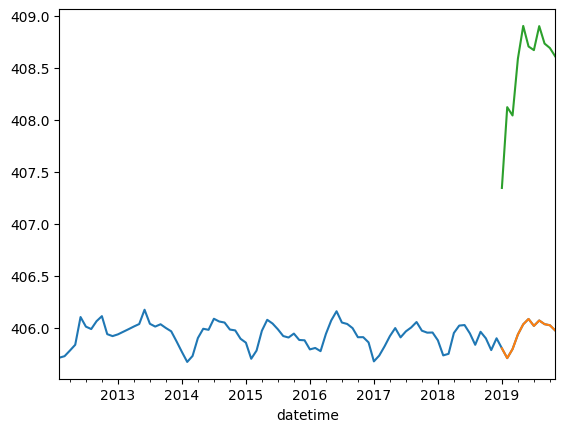

In [213]:
import matplotlib.pyplot as plt
dvar2["water_level"].plot()
dvar_results1["water_level"].plot()
dvar_results2["water_level"].plot()

In [214]:
def mape(df_true, df_pred):
    # replacing every occurence of zero in the true values with epsilon
    
    error = df_true - df_pred # calculates the error
    
    return 100 * np.mean(np.abs(error/df_true), axis=0) # resturns the MAPE
 
# importing mean square error
from sklearn.metrics import mean_squared_error as mse

# defining a function to return a dataframe of rmse and mape scores
def get_rmse_and_mape(df_true, df_pred):
    results = {'RMSE': mse(np.array(df_true), np.array(df_pred), multioutput='raw_values', squared=False), 
               'MAPE (%)': mape(np.array(df_true), np.array(df_pred))}
    
    return pd.DataFrame(results, index=df_true.columns)

ModuleNotFoundError: No module named 'sklearn'